In [334]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [335]:
def fillna_column(dataset,column):
    dataset['GroupNew'] = dataset['PassengerId'].str[:4].astype(float)
    dataset_clean = dataset[dataset[column].notna()]
    dict = pd.Series(dataset_clean[column].values,index=dataset_clean.GroupNew).to_dict()
    dataset['New'] = dataset['GroupNew'].map(dict)
    dataset[column].fillna(dataset['New'], inplace=True)
    dataset = dataset.drop(['New','GroupNew'], axis=1)
    return dataset

In [336]:
train_data = pd.read_csv('train.csv')
train_data = fillna_column(train_data,'Cabin')
train_data = train_data[train_data['Cabin'].notna()]

test_data = pd.read_csv('test.csv')
test_data = fillna_column(test_data,'Cabin')
test_data['Cabin'].fillna(method='ffill',inplace=True)

all_data = pd.concat([train_data.assign(data="train"),test_data.assign(data="test")], axis=0)

In [337]:
all_data.replace({False: 0, True: 1}, inplace=True)
all_data['Group'], all_data['CabinDeck'], all_data['CabinSide'] = all_data['PassengerId'].str[:4].astype(float), all_data['Cabin'].str[0], all_data['Cabin'].str[-1]
df = all_data.groupby('Group')['Group'].count()
dict = pd.Series(df.values, index=df.index).to_dict()
all_data['FamilyNum'] = all_data['Group'].map(dict)

all_data.drop(['PassengerId','Name','Cabin'], axis=1, inplace=True)

In [338]:
all_data.isna().sum()

HomePlanet       284
CryoSleep        308
Destination      272
Age              266
VIP              293
RoomService      262
FoodCourt        287
ShoppingMall     305
Spa              283
VRDeck           267
Transported     4277
data               0
Group              0
CabinDeck          0
CabinSide          0
FamilyNum          0
dtype: int64

In [339]:
categorical_columns = ['HomePlanet','Destination','CabinDeck','CabinSide']
all_data = pd.get_dummies(all_data, columns=categorical_columns)

In [340]:
all_data.head(20)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data,...,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_P,CabinSide_S
0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train,...,0,1,0,0,0,0,0,0,1,0
1,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,train,...,0,0,0,0,0,1,0,0,0,1
2,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0,train,...,1,0,0,0,0,0,0,0,0,1
3,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0,train,...,1,0,0,0,0,0,0,0,0,1
4,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,train,...,0,0,0,0,0,1,0,0,0,1
5,0.0,44.0,0.0,0.0,483.0,0.0,291.0,0.0,1.0,train,...,0,0,0,0,0,1,0,0,1,0
6,0.0,26.0,0.0,42.0,1539.0,3.0,0.0,0.0,1.0,train,...,0,0,0,0,0,1,0,0,0,1
7,1.0,28.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,train,...,0,0,0,0,0,0,1,0,0,1
8,0.0,35.0,0.0,0.0,785.0,17.0,216.0,0.0,1.0,train,...,0,0,0,0,0,1,0,0,0,1
9,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,train,...,0,1,0,0,0,0,0,0,1,0


<AxesSubplot: xlabel='Age', ylabel='Count'>

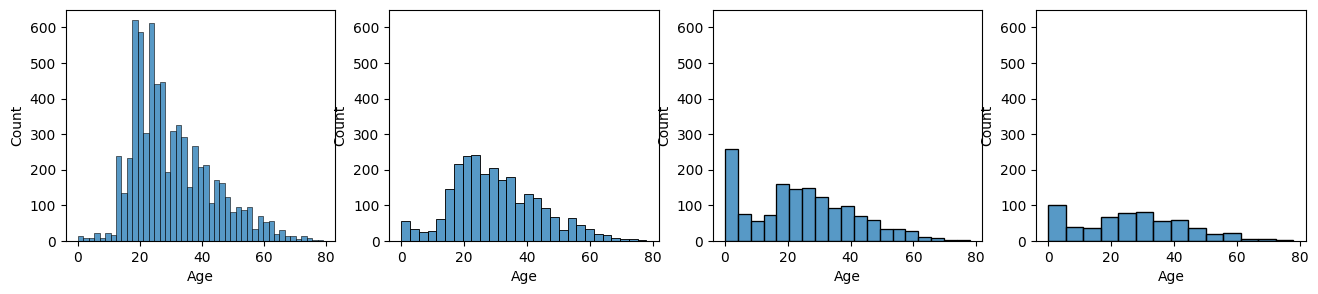

In [341]:
plt.figure(figsize=(16,3))
plt.subplot(1,4,1)
plt.ylim([0,650])
sns.histplot(all_data[all_data['FamilyNum']==1]['Age'])
plt.subplot(1,4,2)
plt.ylim([0,650])
sns.histplot(all_data[all_data['FamilyNum']==2]['Age'])
plt.subplot(1,4,3)
plt.ylim([0,650])
sns.histplot(all_data[all_data['FamilyNum']==3]['Age'])
plt.subplot(1,4,4)
plt.ylim([0,650])
sns.histplot(all_data[all_data['FamilyNum']==4]['Age'])

## Building Model for Age

In [342]:
age_data = all_data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','FamilyNum','Age']].copy()
age_data = pd.get_dummies(age_data, columns=['FamilyNum'])
age_test = age_data.copy()
age_test.drop('Age', axis=1, inplace=True)
age_test.fillna(0.0, inplace=True)
age_data.dropna(inplace=True)
age_x, age_y = age_data.drop('Age', axis=1), age_data['Age']

In [343]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
age_x = pd.DataFrame(scaler.fit_transform(age_x), columns=age_x.columns)
age_test = pd.DataFrame(scaler.transform(age_test), columns=age_test.columns)

In [344]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(age_x, age_y, test_size=0.1, random_state=42)

from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=500, early_stopping_rounds=5)
xgb.fit(x_train,y_train,eval_set=[(x_val,y_val)])

[0]	validation_0-rmse:24.70611
[1]	validation_0-rmse:19.96246
[2]	validation_0-rmse:17.09292
[3]	validation_0-rmse:15.46164
[4]	validation_0-rmse:14.56880
[5]	validation_0-rmse:14.09154
[6]	validation_0-rmse:13.83657
[7]	validation_0-rmse:13.69319
[8]	validation_0-rmse:13.63038
[9]	validation_0-rmse:13.59013
[10]	validation_0-rmse:13.58152
[11]	validation_0-rmse:13.57852
[12]	validation_0-rmse:13.57580
[13]	validation_0-rmse:13.58193
[14]	validation_0-rmse:13.57977
[15]	validation_0-rmse:13.58324
[16]	validation_0-rmse:13.58210
[17]	validation_0-rmse:13.59409


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=5,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [345]:
result = xgb.predict(age_test)
age_test['Age'] = result
all_data['Age'].fillna(age_test['Age'], inplace=True)

[0.0, 1000.0, 0.0, 1000.0, 0.0, 1000.0]

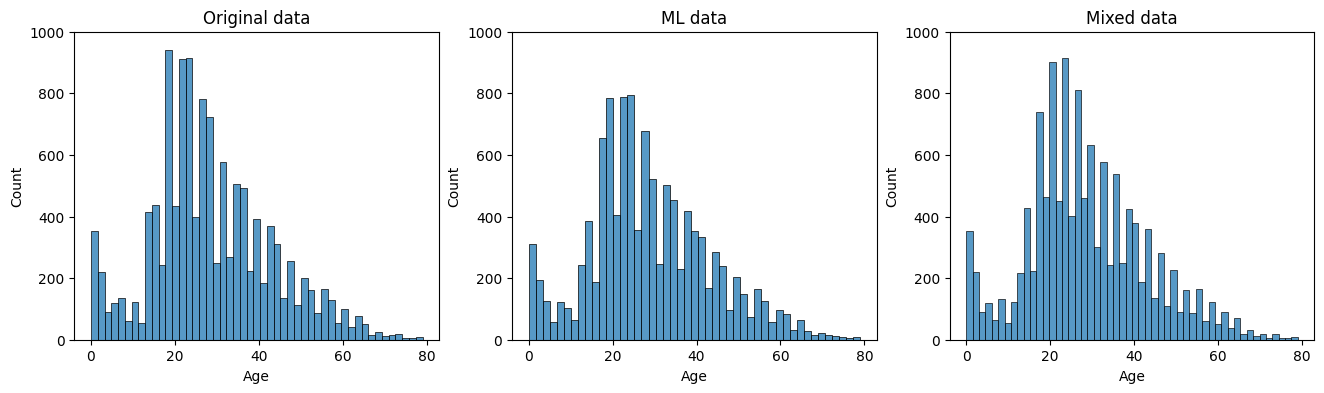

In [346]:
plt.figure(figsize=(16,4))
ax1 = plt.subplot(1,3,1)
sns.histplot(pd.concat([train_data['Age'],test_data['Age']]))
ax1.set_title('Original data')
ax2 = plt.subplot(1,3,2)
sns.histplot(age_data['Age'])
ax2.set_title('ML data')
ax3 = plt.subplot(1,3,3)
sns.histplot(all_data['Age'])
ax3.set_title('Mixed data')
plt.setp([ax1,ax2,ax3], ylim=(0,1000))

## Furthur Clean

In [347]:
modecolumns = ['CryoSleep','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
for column in modecolumns:
    all_data[column].fillna(all_data[column].mode()[0], inplace=True)

In [348]:
all_data.isna().sum()

CryoSleep                       0
Age                             0
VIP                             0
RoomService                     0
FoodCourt                       0
ShoppingMall                    0
Spa                             0
VRDeck                          0
Transported                  4277
data                            0
Group                           0
FamilyNum                       0
HomePlanet_Earth                0
HomePlanet_Europa               0
HomePlanet_Mars                 0
Destination_55 Cancri e         0
Destination_PSO J318.5-22       0
Destination_TRAPPIST-1e         0
CabinDeck_A                     0
CabinDeck_B                     0
CabinDeck_C                     0
CabinDeck_D                     0
CabinDeck_E                     0
CabinDeck_F                     0
CabinDeck_G                     0
CabinDeck_T                     0
CabinSide_P                     0
CabinSide_S                     0
dtype: int64

In [349]:
train_data, test_data = all_data[all_data['data'].eq('train')].drop('data', axis=1), all_data[all_data['data'].eq('test')].drop(['data','Transported'], axis=1)

In [350]:
train_data.drop(['Group','FamilyNum'], axis=1, inplace=True)
test_data.drop(['Group','FamilyNum'], axis=1, inplace=True)

## Final

In [351]:
test_data.shape

(4277, 24)

In [352]:
y = train_data['Transported'].astype(int)
x = train_data.drop(['Transported'], axis=1)
x_test = test_data

In [353]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.1,random_state=42)

In [354]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(input_shape=[24]),
    layers.Dense(units=48, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(units=24, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='Adam', loss="binary_crossentropy", metrics=["binary_accuracy"])
early_stopping = keras.callbacks.EarlyStopping(patience=5, min_delta=0.001, restore_best_weights=True)

In [355]:
history = model.fit(
    x_train,y_train,
    validation_data=(x_val,y_val),
    epochs=200,
    batch_size=256,
    callbacks=early_stopping
)

Epoch 1/200
31/31 [==============================] - 3s 19ms/step - loss: 0.6090 - binary_accuracy: 0.6787 - val_loss: 0.6114 - val_binary_accuracy: 0.7151
Epoch 2/200
31/31 [==============================] - 0s 7ms/step - loss: 0.4956 - binary_accuracy: 0.7564 - val_loss: 0.5740 - val_binary_accuracy: 0.7512
Epoch 3/200
31/31 [==============================] - 0s 7ms/step - loss: 0.4583 - binary_accuracy: 0.7737 - val_loss: 0.5356 - val_binary_accuracy: 0.7581
Epoch 4/200
31/31 [==============================] - 0s 9ms/step - loss: 0.4393 - binary_accuracy: 0.7860 - val_loss: 0.5033 - val_binary_accuracy: 0.7605
Epoch 5/200
31/31 [==============================] - 0s 8ms/step - loss: 0.4259 - binary_accuracy: 0.7923 - val_loss: 0.4769 - val_binary_accuracy: 0.7663
Epoch 6/200
31/31 [==============================] - 0s 8ms/step - loss: 0.4182 - binary_accuracy: 0.7967 - val_loss: 0.4580 - val_binary_accuracy: 0.7744
Epoch 7/200
31/31 [==============================] - 0s 7ms/step - lo

In [356]:
result = model.predict(x_test)

134/134 [==============================] - 1s 3ms/step


In [357]:
new_result = []
for value in result:
    if value>=0.5:
        new_result.append('True')
    else:
        new_result.append('False')

In [311]:
test_data = pd.read_csv('test.csv')
df = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Transported': new_result})
df.to_csv('submission.csv',index=False)